```
Use joblib library to run them in parallel.
```

In [10]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

np.random.seed(2017)

%run ../src/santa_helper.py
%run ../src/greedy_solution.py
%run ../src/helpers.py

In [2]:
# load information about the gifts
gifts = pd.read_csv('../data/gifts.csv'); gifts.head(2)

,GiftId
0,horse_0
1,horse_1


```
Aim of this notebook is to look at how to deal with uncertainity and set up a local scoring system.
```

```
We do not have any information about the individual weights but we know about the distributions from which the individual weights come from.
```

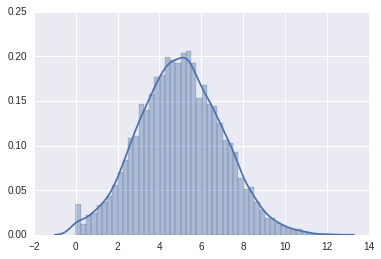

In [6]:
sns.distplot(draw_distributions('horse', sample_size=1e4));

**
Question: What about the distribution of the total weight when we can only fill the 1000 bags with horses ?
**

In [41]:
def perform_simulations(types, n=1000):
    sim_weights = []
    
    for i in range(n):
        gifts_with_weights = generate_weights(gifts.copy(), types)
        gifts_with_weights = sort_weights_std(gifts_with_weights)
        solutions          = multi_bag_solution(gifts_with_weights.weights.values, 1000)
    
        sim_weights.append(solution_weight(solutions, gifts_with_weights.weights))
    
    return sim_weights

In [34]:
sim_weights = perform_simulations(['horse'])

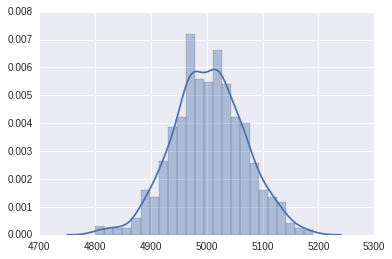

In [35]:
sns.distplot(sim_weights);

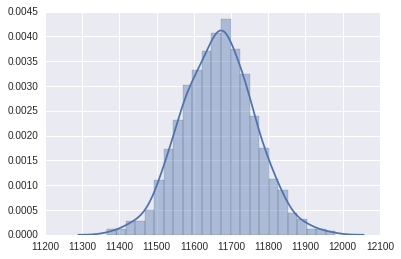

In [39]:
sim_weights = perform_simulations(['blocks'])
sns.distplot(sim_weights);

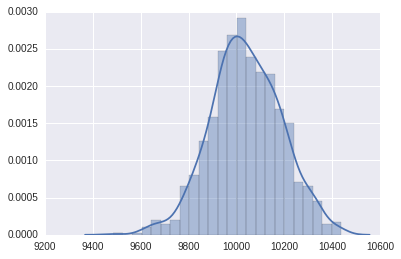

In [40]:
sim_weights = perform_simulations(['train'])
sns.distplot(sim_weights);

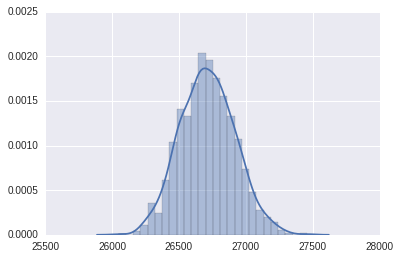

In [42]:
sim_weights = perform_simulations(['train', 'blocks', 'horse'])
sns.distplot(sim_weights);

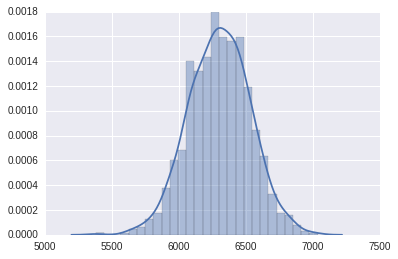

In [43]:
sim_weights = perform_simulations(['coal', 'book'])
sns.distplot(sim_weights);

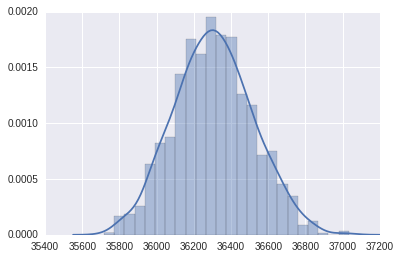

In [44]:
sim_weights = perform_simulations(['train', 'blocks', 'horse', 'doll', 'book', 'ball'])
sns.distplot(sim_weights);

```
If we only take greedy approach and only try to fit gifts of certain types we get a public leaderboard score of 15805.15909 :(
```

In [45]:
gifts_with_weights = generate_weights(gifts.copy(), ['train', 'blocks', \
                                                     'horse', 'doll', 'book', 'ball'])

gifts_with_weights = sort_weights_std(gifts_with_weights)
solution           = multi_bag_solution(gifts_with_weights.weights.values, 1000)

names               = gifts_with_weights.GiftId.values
solution_with_names = index_to_name(solution, names)

prepare_solution('greedy_gifts_subset', solution_with_names)

** Let's analyze this submissions what went wrong. **

In [3]:
greedy_gifts_subset = pd.read_csv('../submissions/greedy_gifts_subset.csv')

In [9]:
print('Number of bags that could not be filled ', 1000 - len(greedy_gifts_subset))
print('Percentage of bags that could not be filled ', (1000 - len(greedy_gifts_subset)) / 1000 * 100)

Number of bags that could not be filled  267
Percentage of bags that could not be filled  26.700000000000003
